In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('survey_results_public.csv')

In [4]:
df.shape

(88883, 85)

In [5]:
df['Hobbyist'].value_counts()

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

In [7]:
dictionary = {
    "first_name": ['Nick', 'Mark', 'John', 'Jane'],
    "last_name": ['Gundobin', 'Hayes-Curry', 'Doe', 'Doe'],
    "email": ['ngundobin@gmail.com', 'mark-alan@gmail.com', 'john.doe@yahoo.com', 'jane.doe@gmail.com']
}

In [8]:
df_dict = pd.DataFrame(dictionary)

In [9]:
df_dict

,first_name,last_name,email
0,Nick,Gundobin,ngundobin@gmail.com
1,Mark,Hayes-Curry,mark-alan@gmail.com
2,John,Doe,john.doe@yahoo.com
3,Jane,Doe,jane.doe@gmail.com


In [10]:
len(df_dict) # rows

4

In [11]:
len(dictionary) # keys

3

In [12]:
len(dictionary['first_name'])

4

In [13]:
len(dictionary['first_name'][0])

4

In [14]:
len(df_dict['first_name'])

4

In [16]:
df_dict['first_name'][0]

'Nick'

In [19]:
df_dict.loc[0, 'first_name']

'Nick'

In [21]:
df_dict['first_name'].loc[0]

'Nick'

In [22]:
df_dict.shape


(4, 3)

In [24]:
df_dict['last_name'].value_counts()


last_name
Doe            2
Gundobin       1
Hayes-Curry    1
Name: count, dtype: int64

In [25]:
df_dict.describe()

,first_name,last_name,email
count,4,4,4
unique,4,3,4
top,Nick,Doe,ngundobin@gmail.com
freq,1,2,1


In [26]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [39]:
ages = df.Age.value_counts().reset_index()
ages = ages.sort_values('Age')

In [28]:
from matplotlib import pyplot as plt

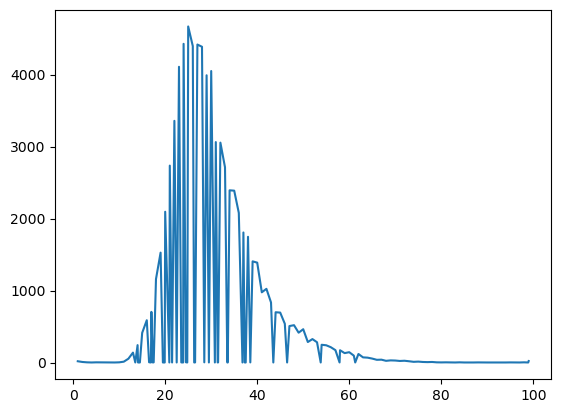

In [41]:
plt.plot(ages['Age'],ages['count'])

In [48]:
df.Hobbyist.value_counts()

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

In [55]:
df_dict[(df_dict['first_name']!='Nick')]
filt = df['LanguageWorkedWith'].str.contains('Python', na=False)
df.loc[filt, 'LanguageWorkedWith']

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
7        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
                               ...                        
88854    Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
88860      Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):
88865      Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):
88872             C;C++;HTML/CSS;JavaScript;PHP;Python;SQL
88876                           HTML/CSS;JavaScript;Python
Name: LanguageWorkedWith, Length: 36443, dtype: object

In [57]:
countries = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada']
filt2 = df['Country'].isin(countries)
df.loc[filt2, 'Country']

0        United Kingdom
3         United States
5                Canada
7                 India
9                 India
              ...      
88859     United States
88863    United Kingdom
88864             India
88877     United States
88878            Canada
Name: Country, Length: 45008, dtype: object

In [60]:
filt3 = (df_dict['last_name'] == 'Gundobin') | (df_dict['first_name'] == 'Nick')

df_dict.loc[~filt3, 'email']

1    mark-alan@gmail.com
2     john.doe@yahoo.com
3     jane.doe@gmail.com
Name: email, dtype: object

In [65]:
df.sort_values(by=['Country', 'ConvertedComp'], ascending=[True, False], inplace=True)

In [69]:
df[['Country', 'ConvertedComp']]

,Country,ConvertedComp
62723,Afghanistan,1000000.0
50172,Afghanistan,153216.0
39018,Afghanistan,19152.0
58082,Afghanistan,17556.0
7056,Afghanistan,14364.0
...,...,...
88873,NaN,NaN
88874,NaN,NaN
88879,NaN,NaN
88880,NaN,NaN


In [84]:
date_parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d %I-%p')
df_dates = pd.read_csv('survey_dates.csv', parse_dates=['Date'], date_parser=date_parser)
df_dates

/var/folders/nx/pm5n08nj72953z1gf7_kyylw0000gn/T/ipykernel_40918/3335161799.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_dates = pd.read_csv('survey_dates.csv', parse_dates=['Date'], date_parser=date_parser)


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [73]:
df_dates.loc[0, 'Date']

'2020-03-13 08-PM'

In [74]:
df_dates['Date'] = pd.to_datetime(df_dates['Date'], format='%Y-%m-%d %I-%p')

In [85]:
df_dates['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [76]:
df_dates.loc[0, 'Date'].day_name()

'Friday'

In [90]:
df_dates.sort_values(by=['Date'], inplace=True, ascending=False)
df_dates

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [99]:
filt4 = (df_dates['Date'] >= pd.to_datetime('2019-01-01')) & (df_dates['Date'] < pd.to_datetime('2020-01-01'))
df_dates['DayOfTheWeek'] = df_dates['Date'].dt.day_name()
df_dates.loc[filt4]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfTheWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [141]:

def random_offset(row):
    return row['Date'] + pd.DateOffset(hours=np.random.randint(1,60), minute=np.random.randint(1,60), second=np.random.randint(1,60))

In [142]:
ddf = df_dates
ddf['new_dates'] = ddf.apply(random_offset, axis=1)
ddf['date_dif']= ddf.new_dates - ddf.Date
ddf['Month'] = ddf['Date'].dt.month_name()
ddf.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfTheWeek,new_dates,date_dif,Month
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday,2020-03-14 20:35:29,1 days 00:35:29,March
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday,2020-03-14 06:31:28,0 days 11:31:28,March
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday,2020-03-14 05:44:13,0 days 11:44:13,March
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday,2020-03-15 13:17:12,1 days 20:17:12,March
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday,2020-03-13 17:39:25,0 days 01:39:25,March


In [144]:
pd.pivot_table(ddf,index='Month', values='date_dif', aggfunc='max')

,date_dif
Month,
April,2 days 11:53:05
August,2 days 11:59:29
December,2 days 11:58:58
February,2 days 11:57:27
January,2 days 11:57:54
July,2 days 11:59:51
June,2 days 11:58:18
March,2 days 11:59:33
May,2 days 11:58:20


In [145]:
country_grp = df.groupby(['Country'])

In [150]:
country_grp.get_group('Russian Federation')

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
69186,69627,I am a developer by profession,No,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Russian Federation,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers,NaN,Man,No,Straight / Heterosexual,Multiracial,Yes,Too long,Neither easy nor difficult
34885,35103,I am a developer by profession,No,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Russian Federation,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
54108,54450,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Russian Federation,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,27.0,Woman,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
39261,39505,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Russian Federation,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,NaN,40.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
27613,27774,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Russian Federation,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57228,57593,I am a developer by profession,No,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Russian Federation,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech meetups or events in your area,38.0,Man,No,Straight / Heterosexual,NaN,Yes,Too long,Difficult
12923,12983,I am a developer by profession,Yes,Less than once per year,NaN,Employed full-time,Russian Federation,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too short,Easy
81599,82108,I am a developer by profession,No,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Russian Federation,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,35.0,Man,NaN,NaN,White or of European descent,Yes,Too long,Neither easy nor difficult
35642,35864,I am a student who is learning to code,Yes,Once a month or more often,The quality of OSS and closed source software ...,NaN,Russian Federation,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers,18.0,Man,No,Straight / Heterosexual,White or

In [152]:
country_grp['SocialMedia'].value_counts().loc['Russian Federation']

SocialMedia
VK ВКонта́кте               442
YouTube                     302
I don't use social media    155
Reddit                      140
Twitter                     130
Instagram                    94
WhatsApp                     90
Facebook                     67
LinkedIn                     35
Snapchat                      1
Name: count, dtype: int64